# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [ ]:
# Install requirements
# !pip install -r requirements.txt | grep -v "already satisfied"

Cell to clone my repository for training on Colab

In [1]:
! git clone https://github.com/karencfisher/landmark-classifier.git
%cd landmark-classifier

Cloning into 'landmark-classifier'...
remote: Enumerating objects: 345, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 345 (delta 45), reused 46 (delta 18), pack-reused 260 (from 1)
Receiving objects: 100% (345/345), 6.79 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (194/194), done.
/content/landmark-classifier


In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
done


Computing std: 100%|████████████████████████| 6246/6246 [01:16<00:00, 81.25it/s]


---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [ ]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.12.12, pytest-8.4.2, pluggy-1.6.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/landmark-classifier
plugins: typeguard-4.4.4, langsmith-0.4.59, anyio-4.12.0
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 4.11s ===============================


---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [3]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 20  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.002  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

In [4]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

scheduler = None

train_losses, valid_losses, _ = optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    scheduler=scheduler
)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 195MB/s]


Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.66it/s]


Epoch: 1 	Training Loss: 3.435394 	Validation Loss: 2.409965 	Validation Accuracy: 45.20%
New minimum validation loss: 2.409965. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]



Epoch: 2 	Training Loss: 2.580043 	Validation Loss: 1.790796 	Validation Accuracy: 55.70%
New minimum validation loss: 1.790796. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]


Epoch: 3 	Training Loss: 2.224662 	Validation Loss: 1.539894 	Validation Accuracy: 60.70%
New minimum validation loss: 1.539894. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]


Epoch: 4 	Training Loss: 2.069974 	Validation Loss: 1.428416 	Validation Accuracy: 63.60%
New minimum validation loss: 1.428416. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.90it/s]


Epoch: 5 	Training Loss: 1.949322 	Validation Loss: 1.310328 	Validation Accuracy: 66.40%
New minimum validation loss: 1.310328. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.68it/s]


Epoch: 6 	Training Loss: 1.854133 	Validation Loss: 1.260451 	Validation Accuracy: 67.20%
New minimum validation loss: 1.260451. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.67it/s]


Epoch: 7 	Training Loss: 1.786679 	Validation Loss: 1.265956 	Validation Accuracy: 67.60%



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.90it/s]


Epoch: 8 	Training Loss: 1.820857 	Validation Loss: 1.240628 	Validation Accuracy: 67.30%
New minimum validation loss: 1.240628. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.66it/s]


Epoch: 9 	Training Loss: 1.758126 	Validation Loss: 1.210118 	Validation Accuracy: 68.40%
New minimum validation loss: 1.210118. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.66it/s]


Epoch: 10 	Training Loss: 1.762057 	Validation Loss: 1.167462 	Validation Accuracy: 69.80%
New minimum validation loss: 1.167462. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 11 	Training Loss: 1.699951 	Validation Loss: 1.163119 	Validation Accuracy: 70.00%



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.67it/s]


Epoch: 12 	Training Loss: 1.658949 	Validation Loss: 1.132405 	Validation Accuracy: 70.70%
New minimum validation loss: 1.132405. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.67it/s]


Epoch: 13 	Training Loss: 1.638912 	Validation Loss: 1.144701 	Validation Accuracy: 69.30%



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.88it/s]


Epoch: 14 	Training Loss: 1.593242 	Validation Loss: 1.153036 	Validation Accuracy: 70.60%



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.67it/s]


Epoch: 15 	Training Loss: 1.625901 	Validation Loss: 1.120526 	Validation Accuracy: 70.30%
New minimum validation loss: 1.120526. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.68it/s]


Epoch: 16 	Training Loss: 1.630141 	Validation Loss: 1.126356 	Validation Accuracy: 70.70%



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.78it/s]


Epoch: 17 	Training Loss: 1.597644 	Validation Loss: 1.105901 	Validation Accuracy: 72.50%
New minimum validation loss: 1.105901. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.70it/s]


Epoch: 18 	Training Loss: 1.603498 	Validation Loss: 1.131107 	Validation Accuracy: 70.40%



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]


Epoch: 19 	Training Loss: 1.554738 	Validation Loss: 1.144639 	Validation Accuracy: 71.00%



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.67it/s]


Epoch: 20 	Training Loss: 1.582401 	Validation Loss: 1.105318 	Validation Accuracy: 70.60%
New minimum validation loss: 1.105318. Saving model ...
Time taken: 00:20:14.915


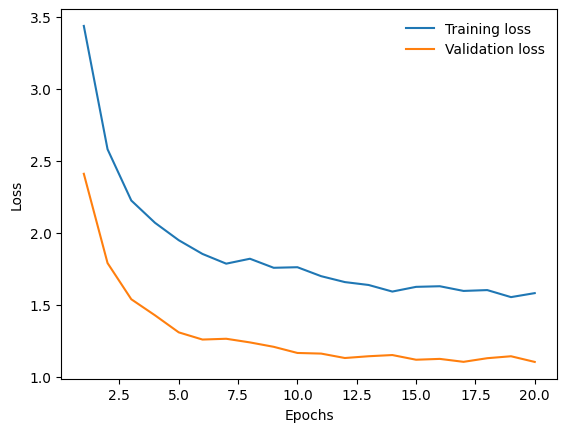

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation loss
x = range(1, len(train_losses) + 1)
plt.plot(x, train_losses, label="Training loss")
plt.plot(x, valid_losses, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.show()

<img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-question-mark-869751.png?raw=1" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-answer-3361020.png?raw=1" alt=">" style="width:25px"/>  __Answer:__ I decided to use ResNet18 for the base of my model, since it performs fairly well on ImageNet and is not too large of a model. Also, since ResNet18 was trained for the ImageNet task, it is a good model to use for this landmark classificaiton task, since both ImageNet and this landmark task use images of natural scenes.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [6]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 20/20 [00:11<00:00,  1.78it/s]

Test Loss: 1.029034


Test Accuracy: 72% (907/1250)


(1.0290338680148126, tensor(0.7256))

---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [7]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


100%|███████████████████████████████████████| 1250/1250 [01:22<00:00, 15.11it/s]


Accuracy: 0.7184


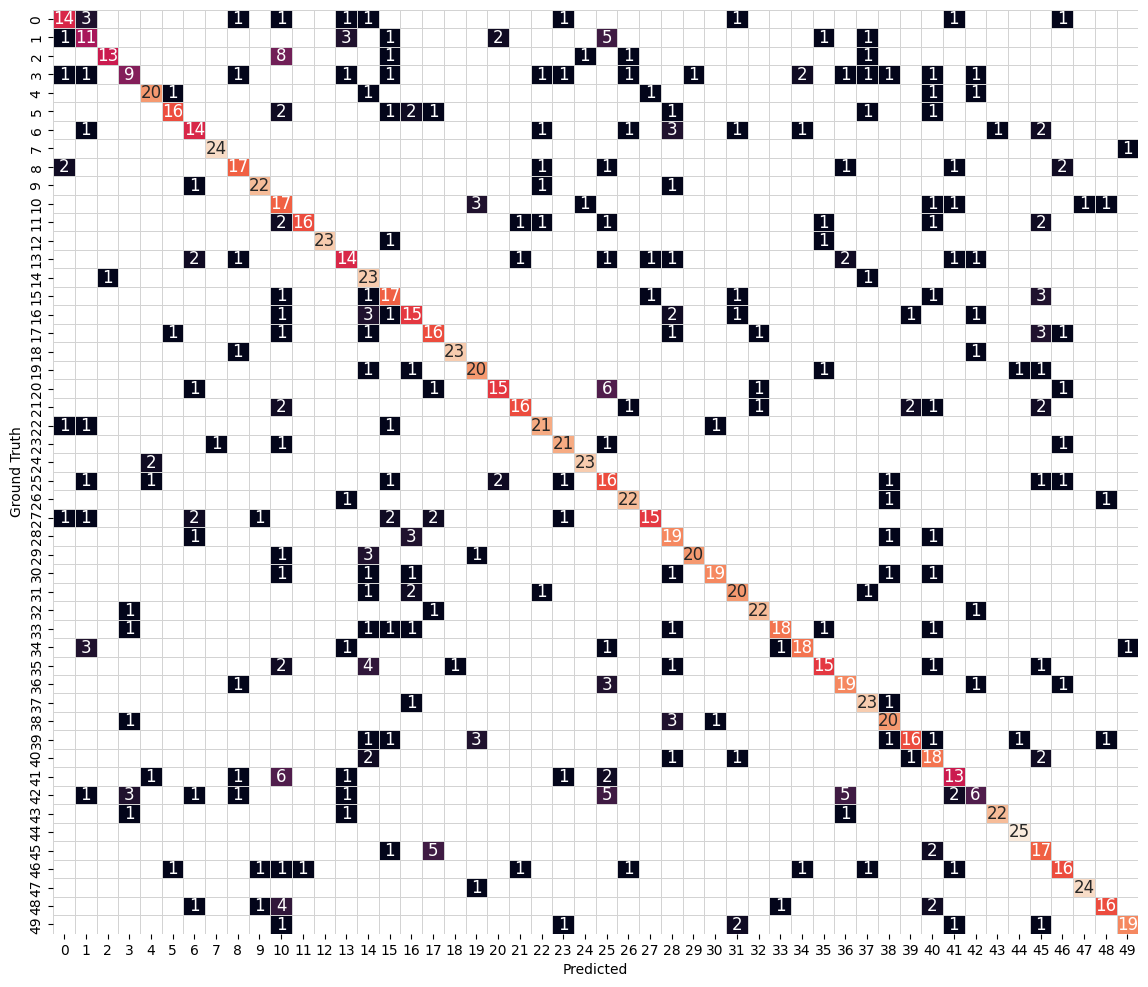

In [8]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)